# Stock Market Analysis


1) Change in stock price over time

2) Average daily return on the stock

3) Moving average of the stocks

4) Correlation between stocks closing prices

5) Correlation between stocks daily return

6) Risk of investing in the stock

7) Can we predict future stock behaviour?

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

C:\Users\Keerthana\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
from pandas.io.data import DataReader

C:\Users\Keerthana\Anaconda2\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [6]:
from datetime import datetime

In [7]:
from __future__ import division

In [8]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [9]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [10]:
end,start

(datetime.datetime(2016, 3, 3, 13, 0, 13, 406000),
 datetime.datetime(2015, 3, 3, 0, 0))

globals() --> allows you to assign the dataframe to the string name variable

In [14]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [15]:
# trying to see if I can do this without using globals function
# for stock in tech_list:
    # df_name = 'df_%s' %(str(stock))
    # DataFrame(name=df_name) = DataReader(stock,'yahoo',start,end)

In [16]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-03,128.960007,129.520004,128.089996,129.360001,37816300,127.005659
2015-03-04,129.100006,129.559998,128.320007,128.539993,31666300,126.200576
2015-03-05,128.580002,128.750000,125.760002,126.410004,56517100,124.109352
2015-03-06,128.399994,129.369995,126.260002,126.599998,72842100,124.295889
2015-03-09,127.959999,129.570007,125.059998,127.139999,88528500,124.826061


In [17]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,116.773953,117.852806,115.473913,116.645494,5.033349e+07,115.363969
std,11.071370,10.882734,11.191846,10.988793,2.060156e+07,10.371798
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,110.629997,111.879997,109.070000,110.370003,3.622240e+07,109.306446
50%,117.519997,118.809998,116.330002,117.809998,4.596430e+07,117.114508
75%,126.410004,127.239998,125.580002,126.410004,5.623850e+07,124.256616
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [18]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-03-03 to 2016-03-02
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


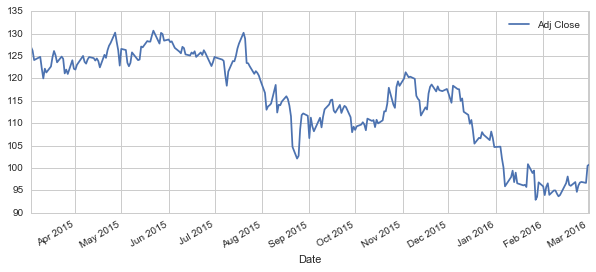

In [36]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

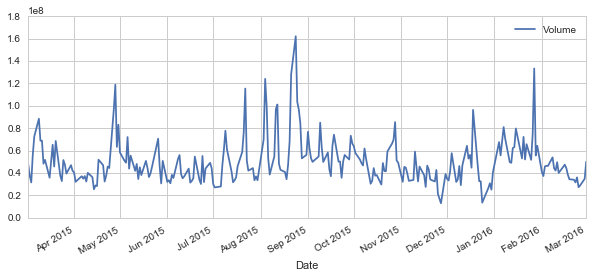

In [35]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

### Moving Average

#### A moving average can help cut down the amount of "noise" on a price chart. Look at the the direction of the moving average to get a basic idea of which way the price is moving

##### A moving average can also act as support or resistance. In an uptrend a 50-day, 100-day or 200-day moving average may act as a support level, as shown in the figure below. This is because the average acts like a floor (support), so the price bounces up off of it. In a downtrend a moving average may act as resistance; like a ceiling, the price hits it and then starts to drop again.


In [37]:
# different days to calculate moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

In [38]:
AAPL.head()


,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2015-03-03,128.960007,129.520004,128.089996,129.360001,37816300,127.005659,NaN,NaN,NaN
2015-03-04,129.100006,129.559998,128.320007,128.539993,31666300,126.200576,NaN,NaN,NaN
2015-03-05,128.580002,128.750000,125.760002,126.410004,56517100,124.109352,NaN,NaN,NaN
2015-03-06,128.399994,129.369995,126.260002,126.599998,72842100,124.295889,NaN,NaN,NaN
2015-03-09,127.959999,129.570007,125.059998,127.139999,88528500,124.826061,NaN,NaN,NaN


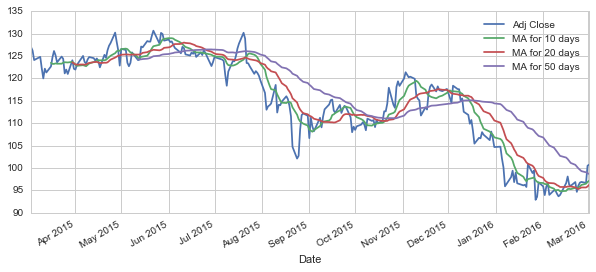

In [39]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots =False,figsize=(10,4))

#subplots argument to make sure all plots are on the same graph

Notice that, lesser the days we calculate the moving average over, the choppier the graph and more the number of days, smoother the graph.

In [57]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2015-03-02,129.250000,130.279999,128.300003,129.089996,48096700,126.740569,NaN,NaN,NaN
2015-03-03,128.960007,129.520004,128.089996,129.360001,37816300,127.005659,NaN,NaN,NaN
2015-03-04,129.100006,129.559998,128.320007,128.539993,31666300,126.200576,NaN,NaN,NaN
2015-03-05,128.580002,128.750000,125.760002,126.410004,56517100,124.109352,NaN,NaN,NaN
2015-03-06,128.399994,129.369995,126.260002,126.599998,72842100,124.295889,NaN,NaN,NaN


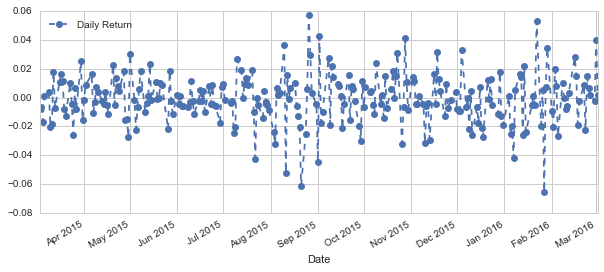

In [40]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True,figsize=(10,4),linestyle='--',marker='o')

In [41]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2015-03-03,128.960007,129.520004,128.089996,129.360001,37816300,127.005659,NaN,NaN,NaN,NaN
2015-03-04,129.100006,129.559998,128.320007,128.539993,31666300,126.200576,NaN,NaN,NaN,-0.006339
2015-03-05,128.580002,128.750000,125.760002,126.410004,56517100,124.109352,NaN,NaN,NaN,-0.016571
2015-03-06,128.399994,129.369995,126.260002,126.599998,72842100,124.295889,NaN,NaN,NaN,0.001503
2015-03-09,127.959999,129.570007,125.059998,127.139999,88528500,124.826061,NaN,NaN,NaN,0.004265


### seaborn.distplot()
This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.stats distributions and plot the estimated PDF over the data.

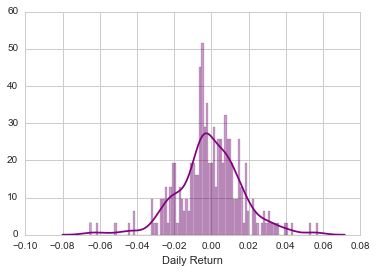

In [65]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

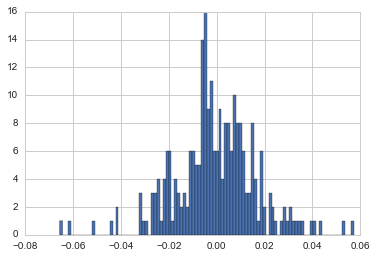

In [66]:
AAPL['Daily Return'].hist(bins=100)

In [21]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [22]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-03,127.005659,384.609985,573.642610,42.130335
2015-03-04,126.200576,382.720001,573.372583,41.916181
2015-03-05,124.109352,387.829987,575.332609,41.964852
2015-03-06,124.295889,380.089996,567.687558,41.234775
2015-03-09,124.826061,378.559998,568.852557,41.711757


In [23]:
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-0.006339,-0.004914,-0.000471,-0.005083
2015-03-05,-0.016571,0.013352,0.003418,0.001161
2015-03-06,0.001503,-0.019957,-0.013288,-0.017397
2015-03-09,0.004265,-0.004025,0.002052,0.011567


### seaborn.jointplot()
Draw a plot of two variables with bivariate and univariate graphs.

#### Pearson product-moment correlation coefficient

In statistics, the Pearson product-moment correlation coefficient (sometimes referred to as the PPMCC or PCC or Pearson's r) is a measure of the linear correlation between two variables X and Y, giving a value between +1 and −1 inclusive, where 1 is total positive correlation, 0 is no correlation, and −1 

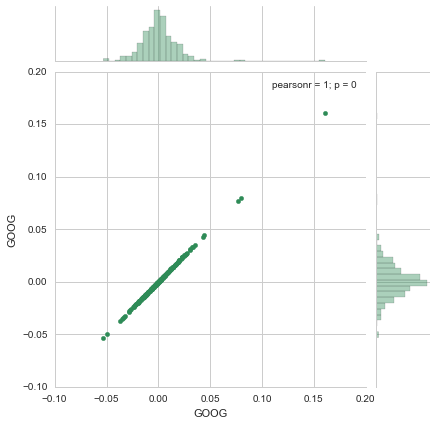

In [85]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color ='seagreen')

# you are comparing google returns to google returns which should ideally produce a linear plot and a pearson coefficient
# (correlation) of 1

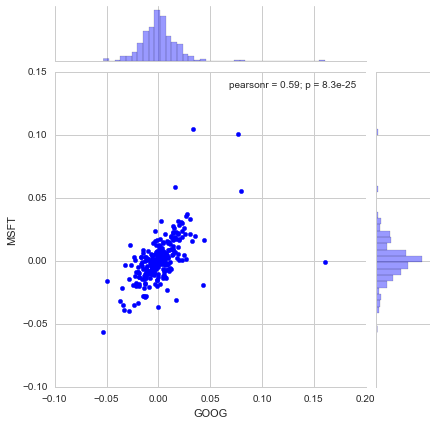

In [87]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color ='blue')

# now the pearson coefficient (correlation coefficient) is 0.59

#### seaborn.pairplot()
Plot pairwise relationships in a dataset.By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use :class`PairGrid` directly if you need more flexibility.


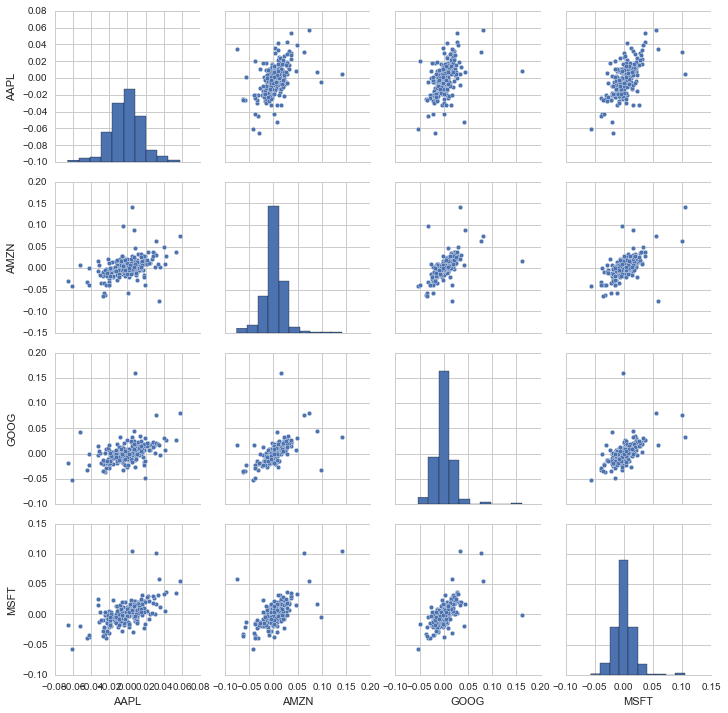

In [90]:
sns.pairplot(tech_rets.dropna())

#### seaborn.pairgrid()

Subplot grid for plotting pairwise relationships in a dataset.

__Methods__

__init__(data[, hue, hue_order, palette, ...])	Initialize the plot figure and PairGrid object.

__add_legend__([legend_data, title, label_order])	Draw a legend, maybe placing it outside axes and resizing the figure.

__map__(func, **kwargs)	Plot with the same function in every subplot.

__map_diag__(func, **kwargs)	Plot with a univariate function on each diagonal subplot.

__map_lower__(func, **kwargs)	Plot with a bivariate function on the lower diagonal subplots.

__map_offdiag__(func, **kwargs)	Plot with a bivariate function on the off-diagonal subplots.

__map_upper__(func, **kwargs)	Plot with a bivariate function on the upper diagonal subplots.

__savefig__(*args, **kwargs)	Save the figure.

__set__(**kwargs)	Set attributes on each subplot Axes.


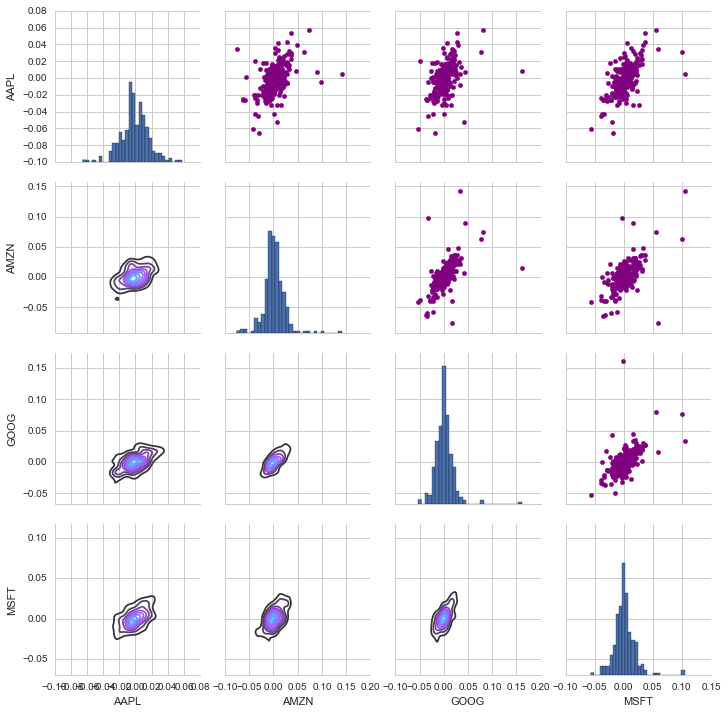

In [93]:
rets_fig = sns.PairGrid(tech_rets.dropna())

rets_fig.map_upper(plt.scatter,color='purple')

rets_fig.map_lower(sns.kdeplot,cmap='cool_d')

rets_fig.map_diag(plt.hist,bins=30)

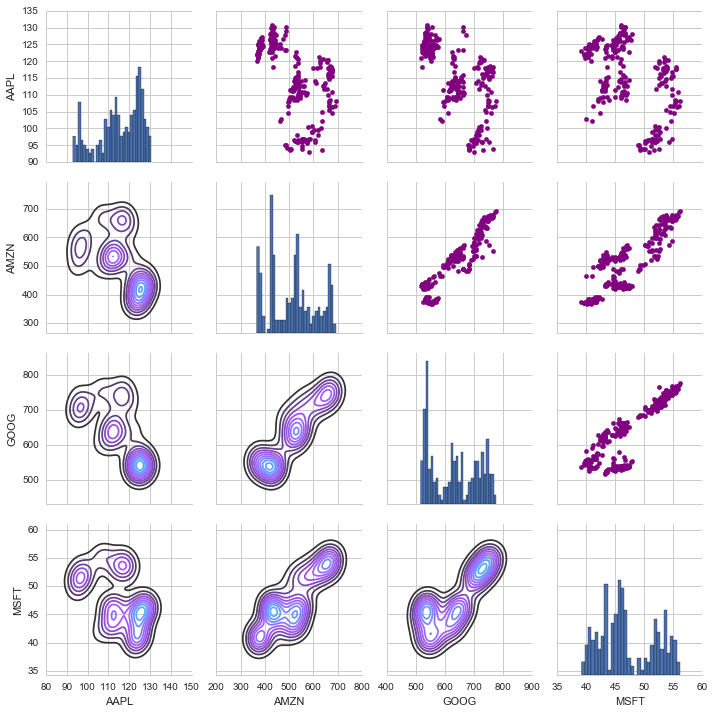

In [94]:
rets_fig = sns.PairGrid(closing_df)

rets_fig.map_upper(plt.scatter,color='purple')

rets_fig.map_lower(sns.kdeplot,cmap='cool_d')

rets_fig.map_diag(plt.hist,bins=30)

# clearly, amazon and microsoft seem to have pretty good correlation looking at the plots

C:\Users\Keerthana\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Keerthana\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


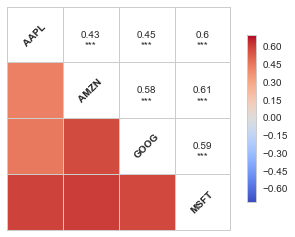

In [95]:
sns.corrplot(tech_rets.dropna(),annot=True)

# annot=true makes sure that the correlation values appear on the plot
# Clearly, amazon and microsoft have the highest correlation

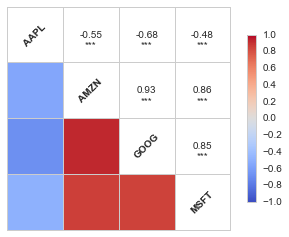

In [96]:
sns.corrplot(closing_df,annot=True)

### Risk analysis of the stocks

In [25]:
rets = tech_rets.dropna()

rets.head()


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-04,-0.006339,-0.004914,-0.000471,-0.005083
2015-03-05,-0.016571,0.013352,0.003418,0.001161
2015-03-06,0.001503,-0.019957,-0.013288,-0.017397
2015-03-09,0.004265,-0.004025,0.002052,0.011567
2015-03-10,-0.020686,-0.023906,-0.024330,-0.019137


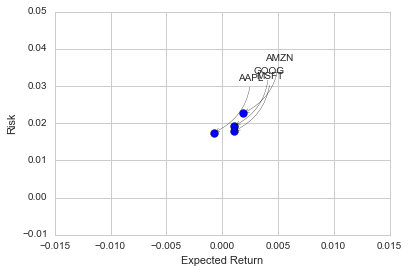

In [33]:
area = np.pi*20

# we are drawing a risk-return graph with the return on the x-axis and risk on the y-axis
plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3'))

### Value at Risk

We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

### Percentile --> 
If your score in the 80th percentile, it means that 80% of the class scored below yours

Percentile of a particular value(x) = (no. of scores below x/total number of scores in class) * 100

### Quartiles --> 
Splittling all the data into 4 quarters
First quartile - Q1 = 25th percentile
Second quartile - Q2 = 50th percentile
Third quartile - Q3 = 75th percentile
Fourth Quartile - Q4 = 100th percentile

### Quantiles -->
Splitting the data into different parts positionally 

In large datasets you can use the normal curve instead of the values on the axis
z score = (x-xmean)/std
you can look up the z-score to percentile chart and do your corresponding calculations



Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.


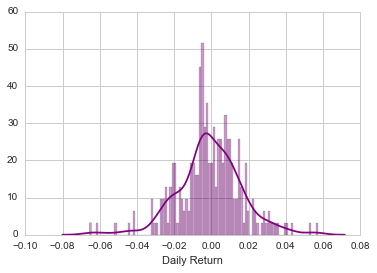

In [44]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [42]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2015-03-03,128.960007,129.520004,128.089996,129.360001,37816300,127.005659,NaN,NaN,NaN,NaN
2015-03-04,129.100006,129.559998,128.320007,128.539993,31666300,126.200576,NaN,NaN,NaN,-0.006339
2015-03-05,128.580002,128.750000,125.760002,126.410004,56517100,124.109352,NaN,NaN,NaN,-0.016571
2015-03-06,128.399994,129.369995,126.260002,126.599998,72842100,124.295889,NaN,NaN,NaN,0.001503
2015-03-09,127.959999,129.570007,125.059998,127.139999,88528500,124.826061,NaN,NaN,NaN,0.004265


In [45]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-04,-0.006339,-0.004914,-0.000471,-0.005083
2015-03-05,-0.016571,0.013352,0.003418,0.001161
2015-03-06,0.001503,-0.019957,-0.013288,-0.017397
2015-03-09,0.004265,-0.004025,0.002052,0.011567
2015-03-10,-0.020686,-0.023906,-0.024330,-0.019137


In [46]:
rets['AAPL'].quantile(0.05)

-0.026870597580305255

The 0.05 empirical quantile of daily returns is at -0.0268. That means that with 95% confidence, our worst daily loss will not exceed 2.68%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0268 * 1,000,000 = $26,800.

In [59]:
rets['AMZN'].quantile(0.05)

-0.032752236116991323

In [60]:
rets['GOOG'].quantile(0.05)

-0.023431274401909789

In [61]:
rets['MSFT'].quantile(0.05)

-0.025056391820929093

### Marco plot method
